$\textbf{PROGRAMMING ASSIGNMENT}$
---
# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

In [1]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [37]:
# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)
print(data)

     Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0          2  12669   9656     7561     214              2674        1338   
1          2   7057   9810     9568    1762              3293        1776   
2          2   6353   8808     7684    2405              3516        7844   
3          1  13265   1196     4221    6404               507        1788   
4          2  22615   5410     7198    3915              1777        5185   
..       ...    ...    ...      ...     ...               ...         ...   
435        1  29703  12051    16027   13135               182        2204   
436        1  39228   1431      764    4510                93        2346   
437        2  14531  15488    30243     437             14841        1867   
438        1  10290   1981     2232    1038               168        2125   
439        1   2787   1698     2510      65               477          52   

     Region  
0         3  
1         3  
2         3  
3         3  
4    

**COMPLETE THE REQUIRED TASKS:**


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

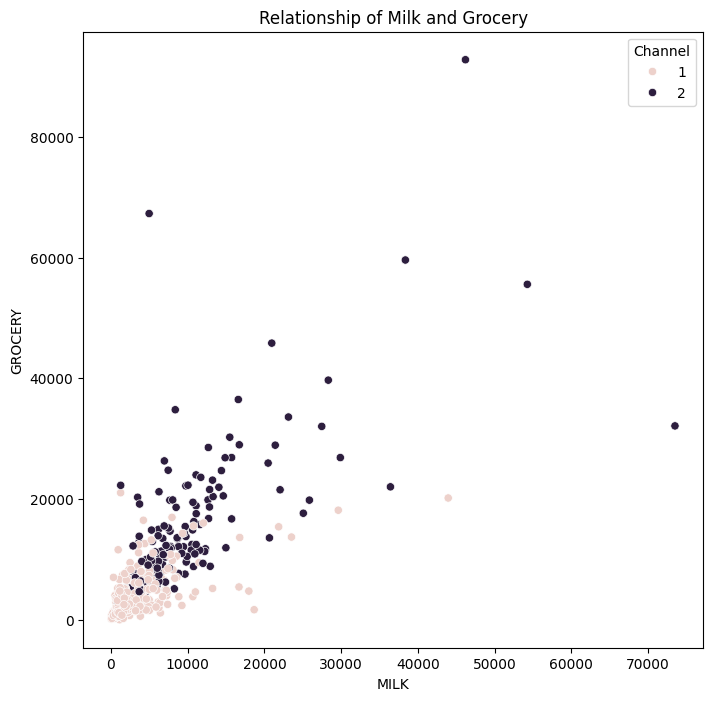

In [38]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data,x='Milk',y='Grocery', hue='Channel')
plt.title('Relationship of Milk and Grocery')
plt.xlabel('MILK')
plt.ylabel('GROCERY')
plt.legend(title='Channel')
plt.show()

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

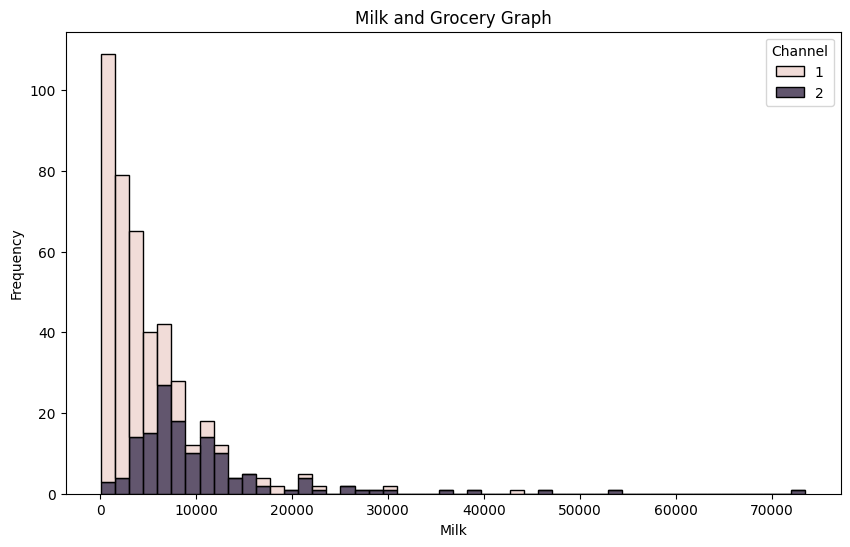

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Milk', hue='Channel', multiple='stack')
plt.title('Milk and Grocery Graph')
plt.xlabel('Milk')
plt.ylabel('Frequency')
plt.show()

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

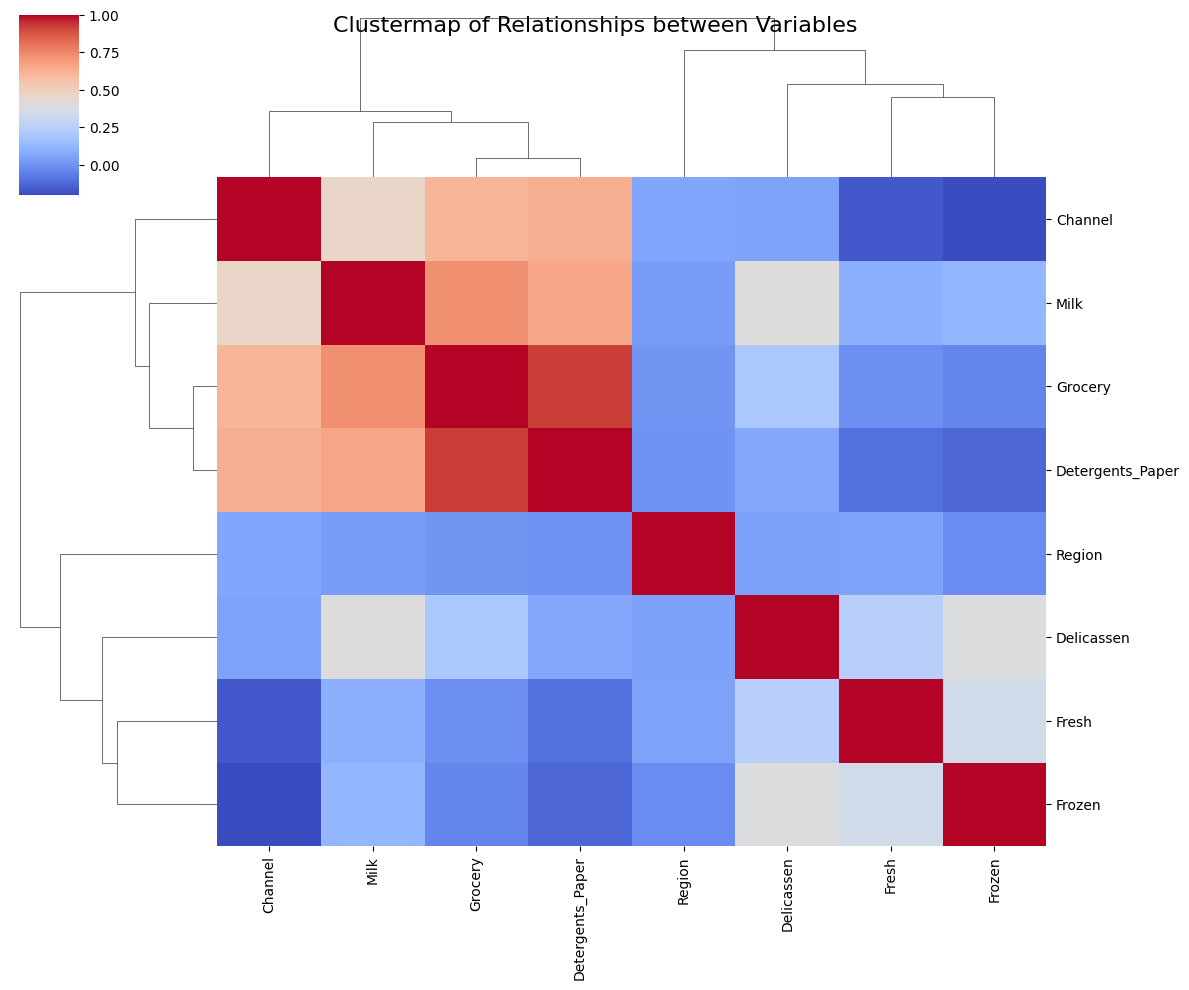

In [40]:
clustermap_fig = sns.clustermap(data.corr(), cmap='coolwarm', figsize=(12, 10))
clustermap_fig.fig.suptitle('Clustermap of Relationships between Variables', fontsize=16)  # Add a figure-level title
plt.show()

**TASK: Create a PairPlot of the dataframe, colored by Region.**

<Figure size 1200x800 with 0 Axes>

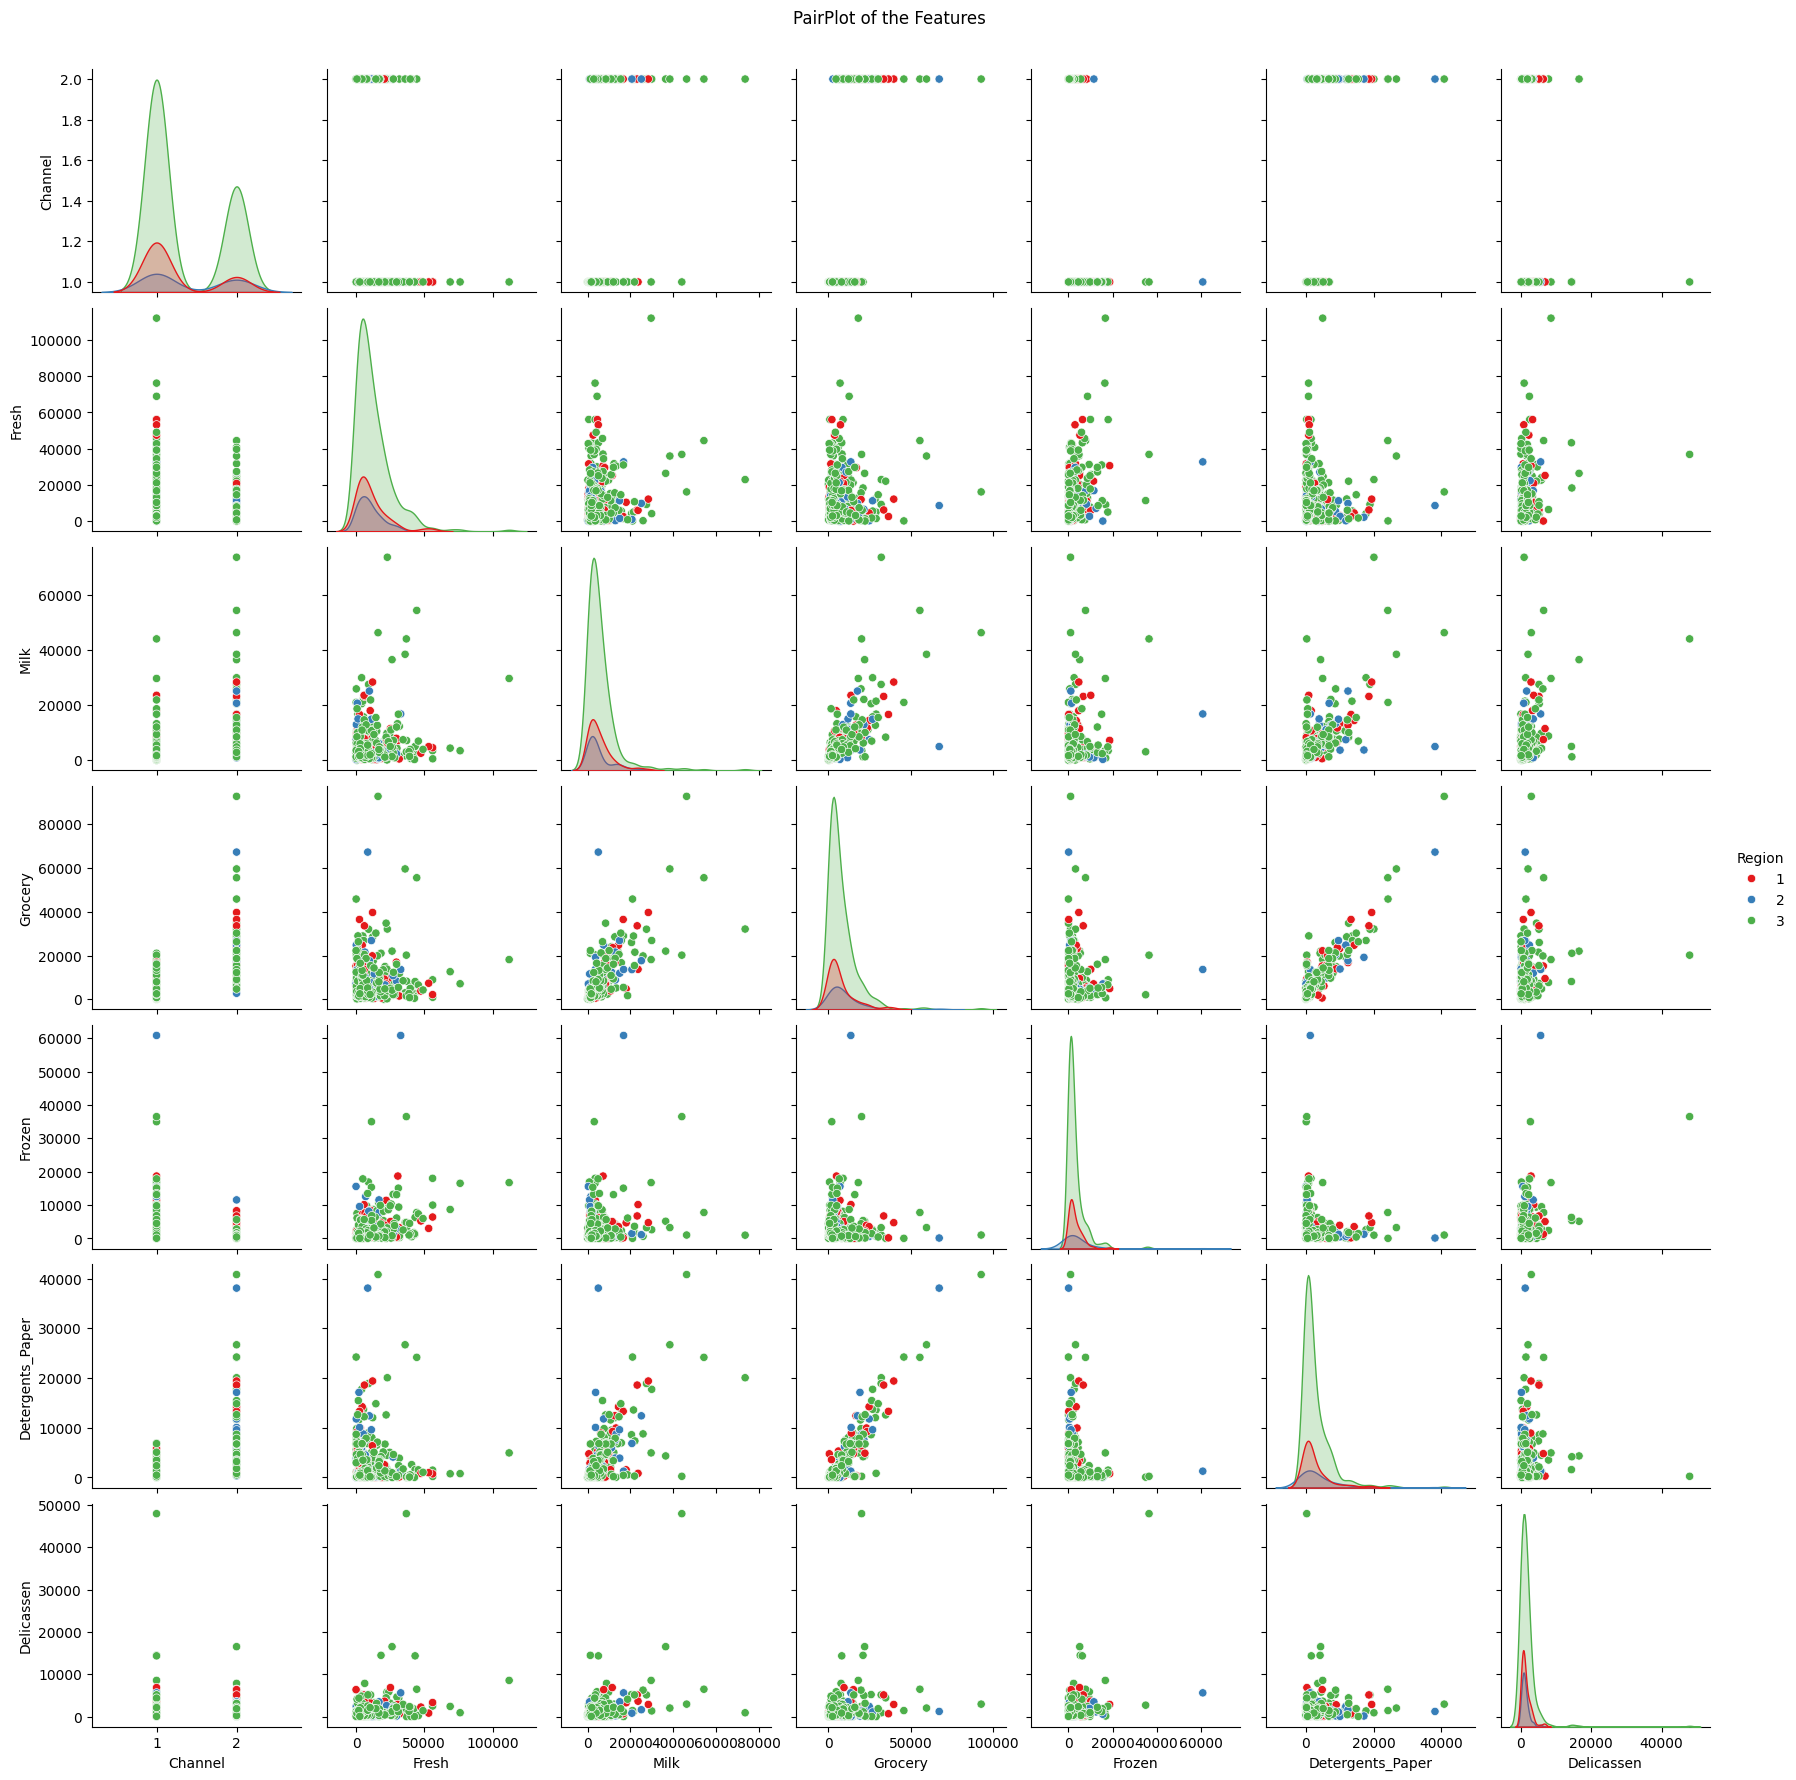

In [41]:
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='Region', palette='Set1')
plt.suptitle('PairPlot of the Features', y=1.02)
plt.show()

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [43]:
epsilon_values = np.linspace(0.001, 3, 50)

percentage_outliers = []

min_samples = 2 * X.shape[1]

for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    dbscan.fit(X_scaled)
    
    percentage_outlier = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100
    
    percentage_outliers.append(percentage_outlier)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

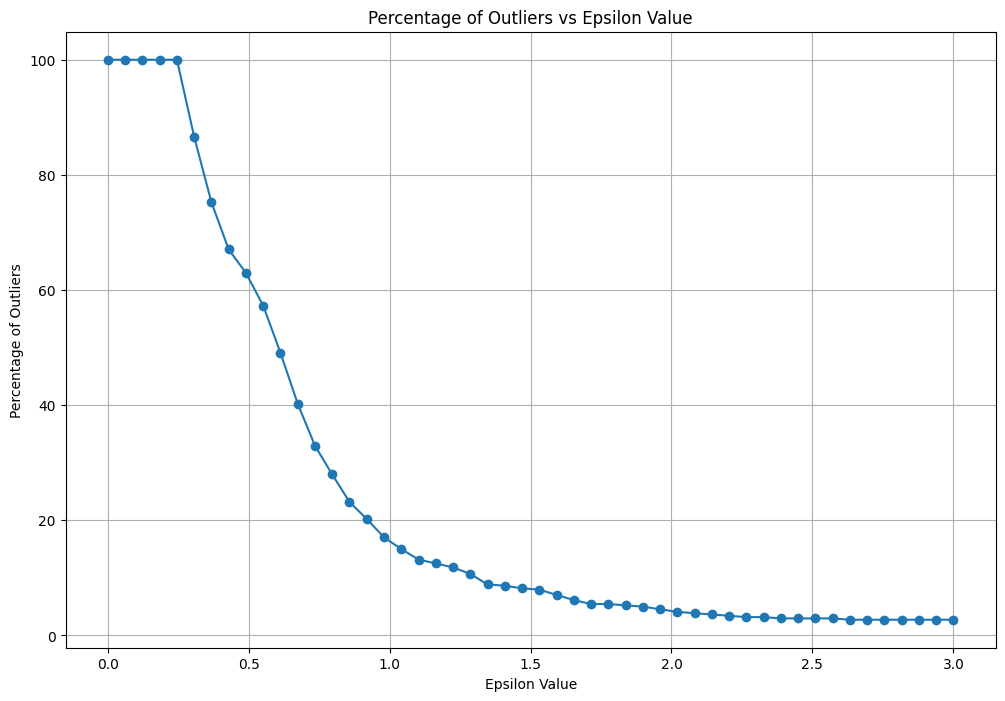

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(epsilon_values, percentage_outliers, marker='o', linestyle='-')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outliers')
plt.title('Percentage of Outliers vs Epsilon Value')
plt.grid(True)
plt.show()

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [45]:
# Retrain DBSCAN model with epsilon=2
dbscan_model = DBSCAN(eps=2, min_samples=2*X.shape[1])  # Use 2 times the number of features as min_samples
dbscan_labels = dbscan_model.fit_predict(X)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

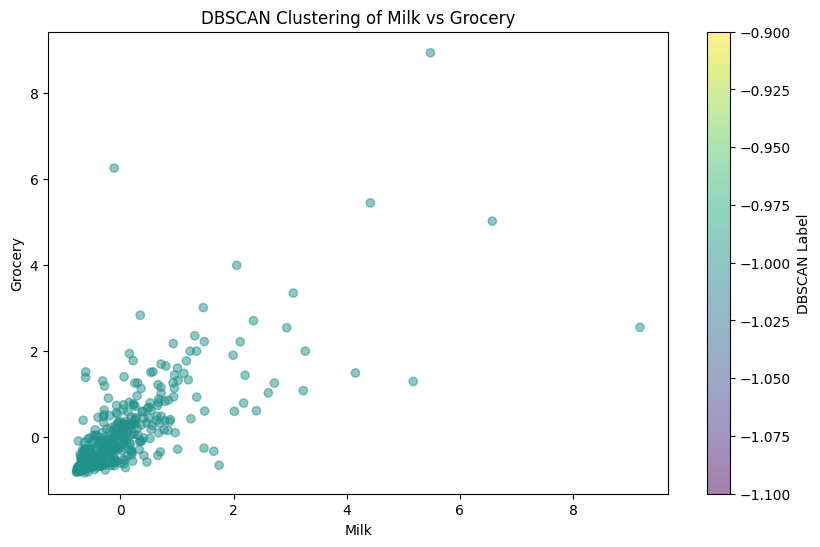

In [46]:
milk = X_scaled[:, X.columns.get_loc('Milk')]
grocery = X_scaled[:, X.columns.get_loc('Grocery')]

plt.figure(figsize=(10, 6))
plt.scatter(milk, grocery, c=dbscan_model.labels_, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering of Milk vs Grocery')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.colorbar(label='DBSCAN Label')
plt.show()


**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

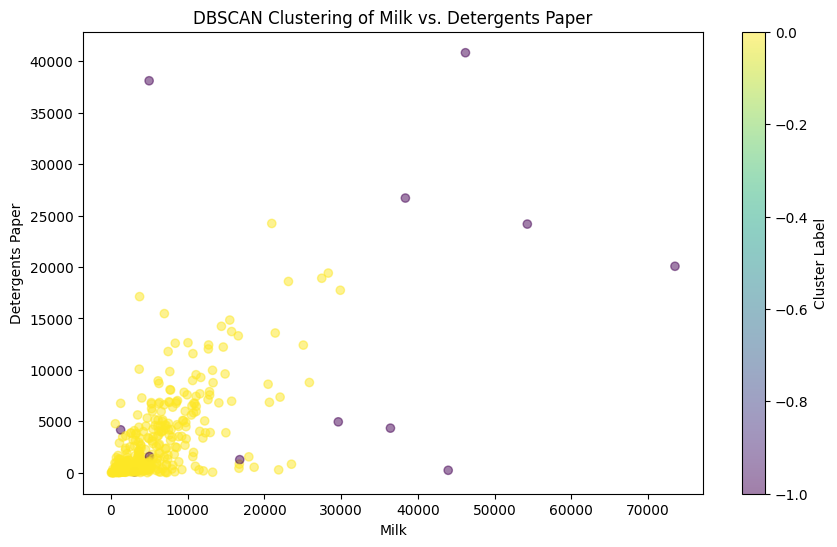

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Milk'], data['Detergents_Paper'], c=dbscan.labels_, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering of Milk vs. Detergents Paper')
plt.xlabel('Milk')
plt.ylabel('Detergents Paper')
plt.colorbar(label='Cluster Label')
plt.show()

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [48]:
data['Labels'] = dbscan.labels_
print(data)

     Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0          2  12669   9656     7561     214              2674        1338   
1          2   7057   9810     9568    1762              3293        1776   
2          2   6353   8808     7684    2405              3516        7844   
3          1  13265   1196     4221    6404               507        1788   
4          2  22615   5410     7198    3915              1777        5185   
..       ...    ...    ...      ...     ...               ...         ...   
435        1  29703  12051    16027   13135               182        2204   
436        1  39228   1431      764    4510                93        2346   
437        2  14531  15488    30243     437             14841        1867   
438        1  10290   1981     2232    1038               168        2125   
439        1   2787   1698     2510      65               477          52   

     Region  Labels  
0         3       0  
1         3       0  
2        

**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [49]:
mean_spending_by_labels = data.groupby('Labels').mean()
print("Cluster Means:")
print(mean_spending_by_labels)

outlier_means = data[data['Labels'] == -1].mean()
print("\nOutlier Means:")
print(outlier_means)

Cluster Means:
         Channel         Fresh          Milk       Grocery        Frozen  \
Labels                                                                     
-1      1.500000  34081.083333  29455.666667  34378.750000  14931.333333   
 0      1.317757  11381.210280   5132.918224   7210.320093   2739.425234   

        Detergents_Paper    Delicassen    Region  
Labels                                            
-1          13874.166667  10307.500000  2.833333  
 0           2573.287383   1278.628505  2.535047  

Outlier Means:
Channel                 1.500000
Fresh               34081.083333
Milk                29455.666667
Grocery             34378.750000
Frozen              14931.333333
Detergents_Paper    13874.166667
Delicassen          10307.500000
Region                  2.833333
Labels                 -1.000000
dtype: float64


**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

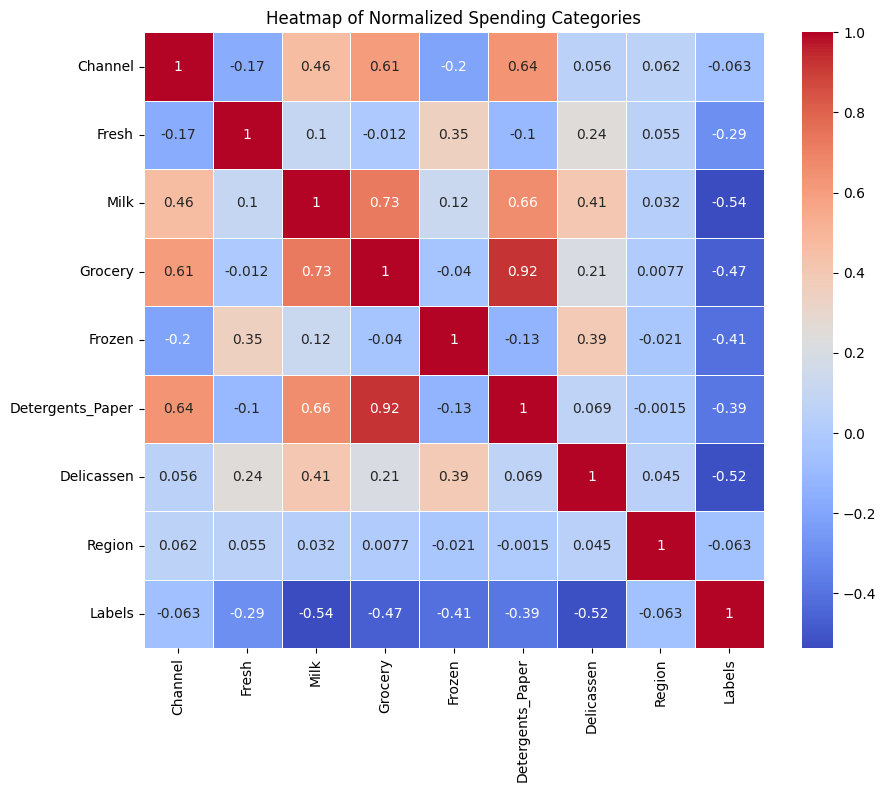

In [50]:
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data.drop(columns=['Labels'])), columns=data.drop(columns=['Labels']).columns)

normalized_data['Labels'] = data['Labels']

plt.figure(figsize=(10, 8))
sns.heatmap(normalized_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Normalized Spending Categories')
plt.show()

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

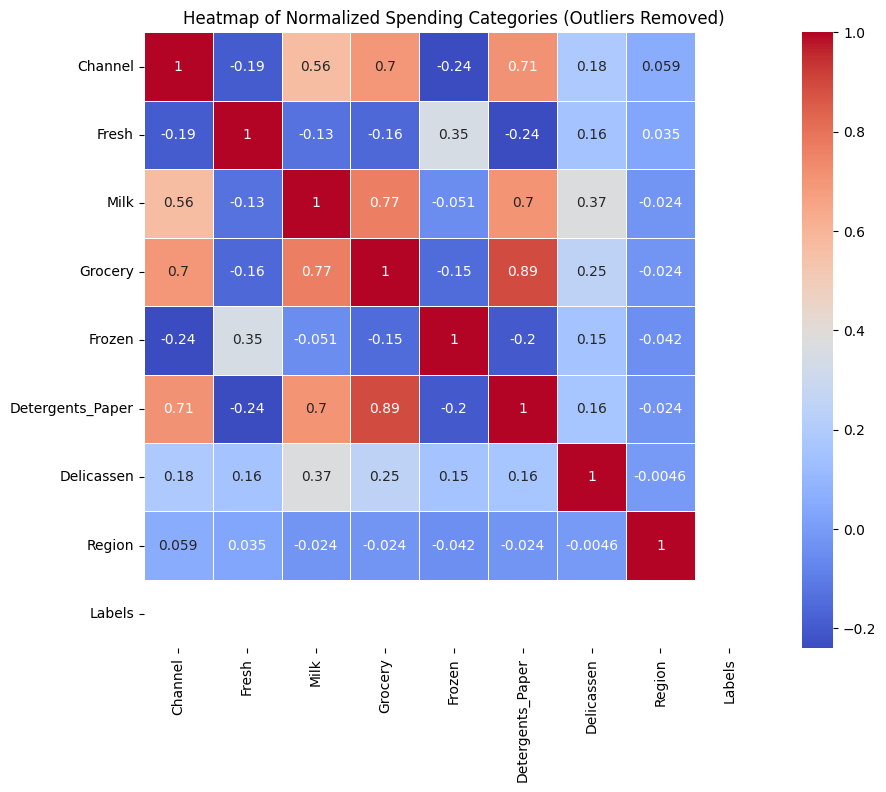

In [51]:
filtered_data = normalized_data[normalized_data['Labels'] != -1]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Normalized Spending Categories (Outliers Removed)')
plt.show()

**TASK: What spending category were the two clusters mode different in?**

In [52]:
cluster_means = X.groupby(y.squeeze()).mean()
absolute_difference = cluster_means.diff().abs().iloc[-1]

most_different_category = absolute_difference.idxmax()
print("Spending category with the highest absolute difference between clusters:", most_different_category)

Spending category with the highest absolute difference between clusters: Fresh
